### Notebook to Visualize Genome Collection Dates From CNCB Metafiles
* Paths may need to be fixed to account for new file locations
* Uses sample collection date as time point

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime as dt

In [44]:
column_names = ['Virus Strain Name','Accession ID','Related ID','Nuc.Completeness','Sequence Quality','Host','Location','Sample Collection Date','Submitting Lab']
meta9_15 = pd.read_excel('metadata9_15.xlsx',usecols=column_names,index_col=1)
meta10_27 = pd.read_excel('metadata10_27.xlsx',usecols=column_names,index_col=1)

In [45]:
date_up_to = '09/10/20'
date_start = '01/23/20'
meta9_15.fillna(' ',inplace=True)
meta10_27.fillna(' ',inplace=True)

In [46]:
#parse country names and replace typos
meta9_15['Country'] = meta9_15['Location'].str.split('/').str[0].str.strip()
meta9_15.loc[meta9_15['Country']=='\u200eRomania','Country'] = 'Romania'
#Remove low quality and partial reads, pretty sure cncb does not run variant annotation for these anyways
meta9_15 = meta9_15[meta9_15['Sequence Quality']!='Low']
meta9_15 = meta9_15[meta9_15['Nuc.Completeness']!='Partial']
#Filter using date as well
meta9_15 = meta9_15[meta9_15['Sample Collection Date']!='2020-00-00'] #bad dates in there
meta9_15.loc[:,'Sample Collection Date'] = pd.to_datetime(meta9_15['Sample Collection Date'], yearfirst=True)
dt_date_up_to = dt.strptime(date_up_to, "%m/%d/%y")
dt_date_start = dt.strptime(date_start, "%m/%d/%y")
meta9_15 = meta9_15[(meta9_15.loc[:,'Sample Collection Date']<dt_date_up_to) & (meta9_15.loc[:,'Sample Collection Date']>dt_date_start)]

#parse country names and replace typos
meta10_27['Country'] = meta10_27['Location'].str.split('/').str[0].str.strip()
meta10_27.loc[meta10_27['Country']=='\u200eRomania','Country'] = 'Romania'
#Remove low quality and partial reads, pretty sure cncb does not run variant annotation for these anyways
meta10_27 = meta10_27[meta10_27['Sequence Quality']!='Low']
meta10_27 = meta10_27[meta10_27['Nuc.Completeness']!='Partial']
#Filter using date as well
meta10_27 = meta10_27[meta10_27['Sample Collection Date']!='2020-00-00'] #bad dates in there
meta10_27.loc[:,'Sample Collection Date'] = pd.to_datetime(meta10_27['Sample Collection Date'], yearfirst=True)
dt_date_up_to = dt.strptime(date_up_to, "%m/%d/%y")
dt_date_start = dt.strptime(date_start, "%m/%d/%y")
meta10_27 = meta10_27[(meta10_27.loc[:,'Sample Collection Date']<dt_date_up_to) & (meta10_27.loc[:,'Sample Collection Date']>dt_date_start)]

In [47]:
counted9_15 = Counter(meta9_15['Sample Collection Date'])
counted10_27 = Counter(meta10_27['Sample Collection Date'])

Text(0.5, 1.0, 'Sequence Coverage Count by Date for 9/15 Metafile')

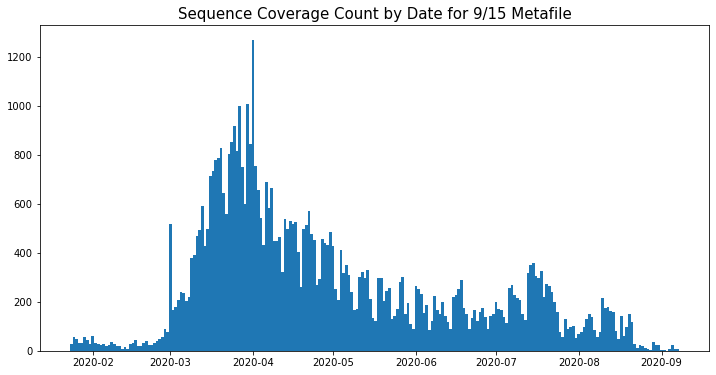

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.bar([date.date() for date in counted9_15.keys()],counted9_15.values(),width=1)
ax.xaxis_date()
ax.set_title('Sequence Coverage Count by Date for 9/15 Metafile',fontsize=15)

Text(0.5, 1.0, 'Sequence Coverage Count by Date for 10/27 Metafile')

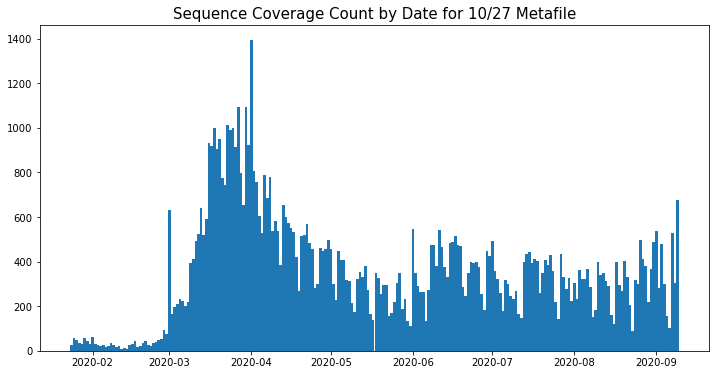

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.bar([date.date() for date in counted10_27.keys()],counted10_27.values(),width=1)
ax.xaxis_date()
ax.set_title('Sequence Coverage Count by Date for 10/27 Metafile',fontsize=15)